In [1]:
!pip install scikit-learn

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


2024-10-16 17:09:19.984381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-16 17:09:19.984420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

# Initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96, 96, 3)

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training and test datasets
training_set = train_datagen.flow_from_directory(
    'training_set',  # Change this to your local path
    target_size=(img_dims[0], img_dims[1]),
    batch_size=batch_size,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'test_set',  # Change this to your local path
    target_size=(img_dims[0], img_dims[1]),
    batch_size=batch_size,
    class_mode='binary'
)



Found 4009 images belonging to 2 classes.
Found 978 images belonging to 2 classes.


libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: training_set/men/533.jpg


libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: training_set/men/104.jpg


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: training_set/women/245.jpg


Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 6 extraneous bytes before marker 0xed
2024-10-16 17:11:16.876712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/saicharan/.local/lib/python3.8/site-packages/cv2/../../lib64:
2024-10-16 17:11:16.876779: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-16 17:11:16.876836: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VTH074): /proc/driver/nvidia/version does not exist
2024-10-16 17:11:16.900836: I tensorflow/core/pl

Epoch 1/100


2024-10-16 17:11:19.997229: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2024-10-16 17:11:20.213422: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.


 1/50 [..............................] - ETA: 1:49 - loss: 0.9811 - accuracy: 0.5625

2024-10-16 17:11:20.660977: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25401600 exceeds 10% of free system memory.
2024-10-16 17:11:20.661098: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25401600 exceeds 10% of free system memory.
2024-10-16 17:11:20.713539: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23369472 exceeds 10% of free system memory.


50/50 [==============================] - 19s 333ms/step - loss: 0.9506 - accuracy: 0.5903 - val_loss: 0.7625 - val_accuracy: 0.4694
Epoch 2/100
50/50 [==============================] - 14s 282ms/step - loss: 0.7520 - accuracy: 0.6519 - val_loss: 0.7490 - val_accuracy: 0.4707
Epoch 3/100
50/50 [==============================] - 12s 238ms/step - loss: 0.6737 - accuracy: 0.6844 - val_loss: 0.9878 - val_accuracy: 0.5156
Epoch 4/100
50/50 [==============================] - 12s 234ms/step - loss: 0.6118 - accuracy: 0.7106 - val_loss: 0.7164 - val_accuracy: 0.5231
Epoch 5/100
50/50 [==============================] - 12s 232ms/step - loss: 0.5940 - accuracy: 0.7234 - val_loss: 0.8565 - val_accuracy: 0.4881
Epoch 6/100
50/50 [==============================] - 12s 230ms/step - loss: 0.5705 - accuracy: 0.7347 - val_loss: 0.6832 - val_accuracy: 0.5980
Epoch 7/100
50/50 [==============================] - 12s 231ms/step - loss: 0.5563 - accuracy: 0.7372 - val_loss: 0.5601 - val_accuracy: 0.6979
Epoc

INFO:tensorflow:Assets written to: /tmp/tmp5v10hw42/assets


INFO:tensorflow:Assets written to: /tmp/tmp5v10hw42/assets
2024-10-16 17:31:36.219489: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-10-16 17:31:36.219575: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-10-16 17:31:36.241919: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp5v10hw42
2024-10-16 17:31:36.261622: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-10-16 17:31:36.261683: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmp5v10hw42
2024-10-16 17:31:36.349980: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-10-16 17:31:36.356178: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-10-16 17:31:36.711744: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

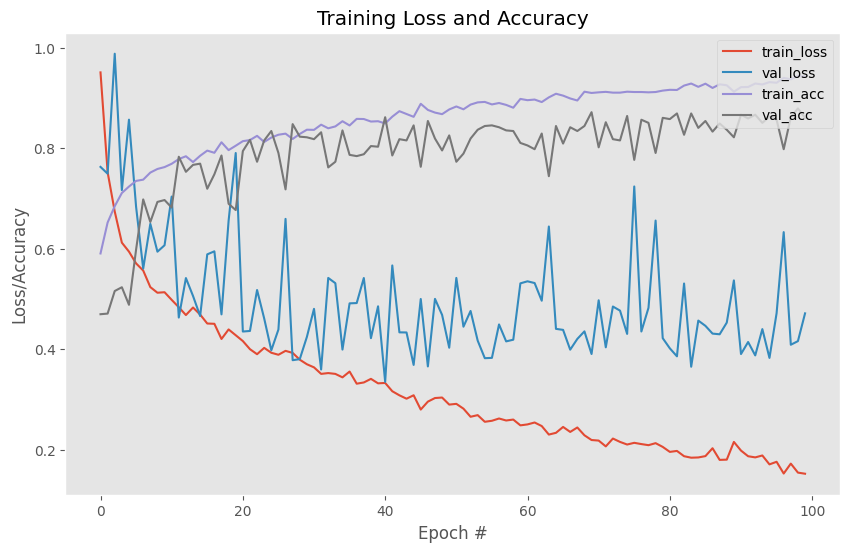

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf

# Initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (64, 64, 3)

data = []
labels = []

# Supported image formats
supported_formats = ('.jpg', '.jpeg', '.png')

# Load training images
train_path = 'training_set'
for category in ['men', 'women']:
    category_path = os.path.join(train_path, category)
    for img_file in os.listdir(category_path):
        if not img_file.lower().endswith(supported_formats):
            continue  # Skip unsupported file formats

        img_path = os.path.join(category_path, img_file)
        image = cv2.imread(img_path)

        if image is None:  # Check if the image was loaded successfully
            print(f"Failed to load image: {img_path}")
            continue

        image = cv2.resize(image, (img_dims[0], img_dims[1]))
        image = img_to_array(image)
        data.append(image)

        label = 1 if category == "women" else 0
        labels.append(label)

# Convert to NumPy arrays and preprocess
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

# One-hot encoding
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# Augmenting dataset
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

# Define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

# Build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=2)

# Compile the model
opt = Adam(learning_rate=lr)  # Update here to use 'learning_rate'
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // batch_size,
              epochs=epochs, verbose=1)

# Save the model in HDF5 format
model.save('gender_detection_model.h5')

# Convert the model to TensorFlow Lite format
# Load the saved model
model = tf.keras.models.load_model('gender_detection_model.h5')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('gender_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
N = epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.grid()

# Display the plot inline
plt.show()


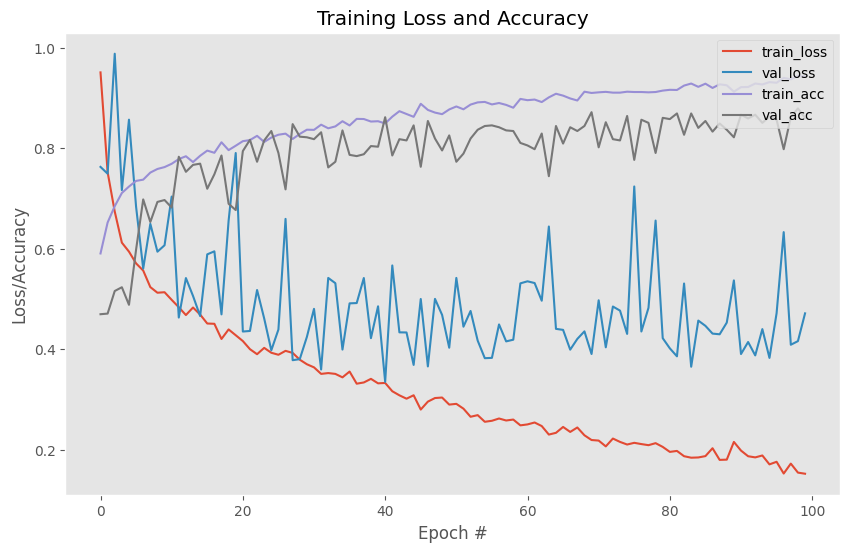

In [4]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
N = epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.grid()

# Display the plot inline
plt.show()


In [5]:
final_train_acc = H.history["accuracy"][-1]
final_val_acc = H.history["val_accuracy"][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9422
Final Validation Accuracy: 0.8602


In [6]:
!pip install cvlib



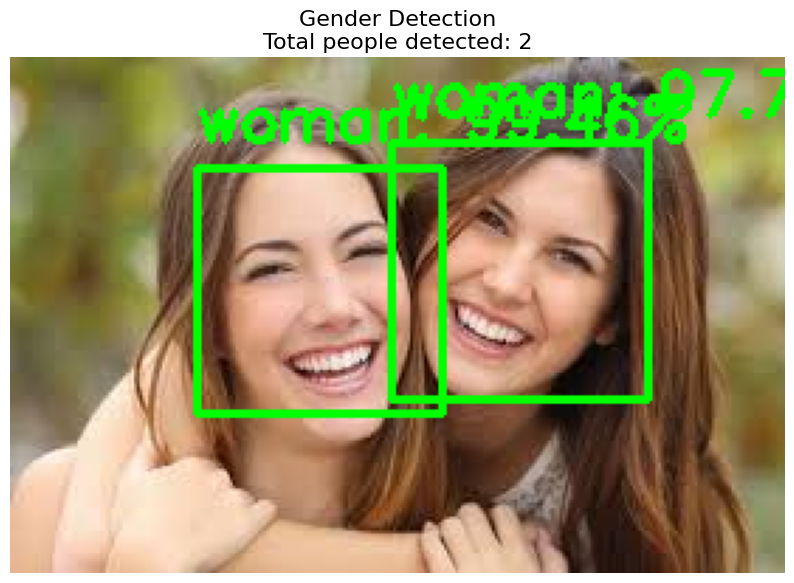

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Load the TFLite model and create an interpreter
interpreter = tf.lite.Interpreter(model_path='gender_detection_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Specify the path to the image
image_path = 'Pop12.jpeg'  # Change this to your image path

# Load the image
frame = cv2.imread(image_path)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# List to hold predictions
predictions = []
total_people = len(faces)  # Count of detected faces

# Loop through detected faces
for (startX, startY, width, height) in faces:
    endX = startX + width
    endY = startY + height

    # Draw rectangle over face
    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # Crop the detected face region
    face_crop = np.copy(frame[startY:endY, startX:endX])

    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
        continue

    # Preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (64, 64))  # Resize to (64, 64)
    face_crop = face_crop.astype("float32") / 255.0  # Ensure it's float32
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], face_crop)

    # Run the model
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get label with max accuracy
    idx = np.argmax(output_data[0])
    label = ['man', 'woman'][idx]
    conf = output_data[0][idx]

    label = "{}: {:.2f}%".format(label, conf * 100)
    predictions.append(label)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # Write label and confidence above face rectangle
    cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# Convert BGR image to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Create a total count label for the image
total_count_label = "Total people detected: {}".format(total_people)

# Display output using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(frame_rgb)
plt.axis('off')  # Hide axis
plt.title("Gender Detection\n" + total_count_label, fontsize=16)  # Add total count to title
plt.show()



Raw confidence scores: [0.02236025 0.9772534 ]
Raw confidence scores: [0.98801965 0.01203516]


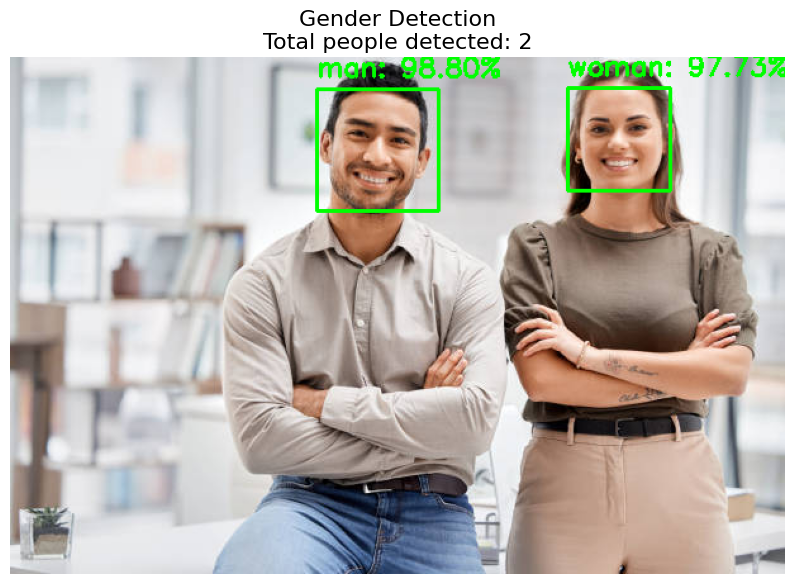

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Load the TFLite model and create an interpreter
interpreter = tf.lite.Interpreter(model_path='gender_detection_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Specify the path to the image
image_path = 'Pop2.jpg'  # Change this to your image path

# Load the image
frame = cv2.imread(image_path)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# List to hold predictions
predictions = []
total_people = len(faces)  # Count of detected faces

# Loop through detected faces
for (startX, startY, width, height) in faces:
    endX = startX + width
    endY = startY + height

    # Draw rectangle over face
    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # Crop the detected face region
    face_crop = np.copy(frame[startY:endY, startX:endX])

    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
        continue

    # Preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (64, 64))  # Resize to (64, 64)
    face_crop = face_crop.astype("float32") / 255.0  # Ensure it's float32
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], face_crop)

    # Run the model
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get label with max accuracy
    idx = np.argmax(output_data[0])
    label = ['man', 'woman'][idx]
    conf = output_data[0][idx]

    # Print raw confidence scores
    print("Raw confidence scores:", output_data[0])

    label = "{}: {:.2f}%".format(label, conf * 100)
    predictions.append(label)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # Write label and confidence above face rectangle
    cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# Convert BGR image to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Create a total count label for the image
total_count_label = "Total people detected: {}".format(total_people)

# Display output using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(frame_rgb)
plt.axis('off')  # Hide axis
plt.title("Gender Detection\n" + total_count_label, fontsize=16)  # Add total count to title
plt.show()
